In [18]:
import os
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm 

In [19]:
def create_color_to_label_map(mask_folder_path):
    """
    Scans all masks in a folder to find unique colors and create a mapping
    from color to a class label.
    """
    print(f"Scanning masks in '{mask_folder_path}'...")
    
    unique_colors = set()
    

    mask_files = os.listdir(mask_folder_path)
    print(mask_files)
   
    for filename in tqdm(mask_files, desc="Finding unique colors"):
        mask_path = os.path.join(mask_folder_path, filename)
        
        # Open the mask image and convert to a NumPy array
        mask_bgr = cv2.imread(mask_path)

        mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
        # Reshape the (H, W, C) array to (H*W, C) to get a list of pixels
        pixels = mask_rgb.reshape(-1, 3)
        
        # Get unique rows (unique RGB colors)
        unique_pixel_colors = np.unique(pixels, axis=0)
        
        # Add the unique colors found in this image to our overall set
        for color in unique_pixel_colors:
            unique_colors.add(tuple(color))
            

    sorted_colors = sorted(list(unique_colors))
    
    # Create the color-to-label dictionary
    color_to_label = {color: label for label, color in enumerate(sorted_colors)}
    
    print("\nScan complete!")
    print(f"Found {len(color_to_label)} unique classes.")
    
    return color_to_label

In [20]:
mask_path = "dataset/cat_and_dog_dataset/SegmentationClass"
COLOR_TO_LABEL = create_color_to_label_map(mask_path)
COLOR_TO_LABEL

Scanning masks in 'dataset/cat_and_dog_dataset/SegmentationClass'...
['2.png', '1.png']


Finding unique colors: 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]


Scan complete!
Found 3 unique classes.


{(0, 0, 0): 0, (0, 128, 0): 1, (128, 0, 0): 2}

In [21]:
import numpy as np
import cv2
from PIL import Image

def encode_mask_to_grayscale(mask_path, color_map):
    """
    Converts an RGB segmentation mask to a grayscale mask with class labels.
    """
    mask_bgr = cv2.imread(mask_path)
    mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
    height, width, _ = mask_rgb.shape
    
    # Create an empty grayscale mask (height x width)
    mask_grayscale = np.zeros((height, width), dtype=np.uint8)
    
    # For each color in our map, find where it is in the mask and assign the label
    for color, label in color_map.items():
        # Find pixels matching the color
        matches = np.where(np.all(mask_rgb == color, axis=-1))
        mask_grayscale[matches] = label
        
    return mask_grayscale




In [22]:
mask_path = "dataset/cat_and_dog_dataset/SegmentationClass/1.png" 
grayscale_label_mask = encode_mask_to_grayscale(mask_path, COLOR_TO_LABEL)

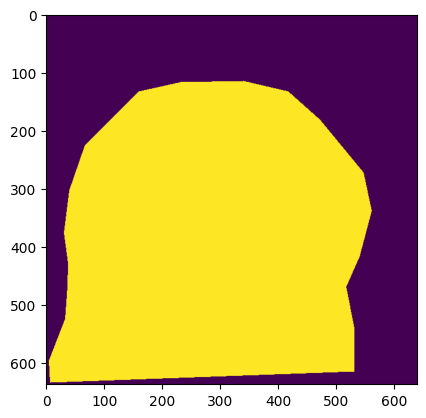

In [23]:
import matplotlib.pyplot as plt
save_path = "dataset/cat_and_dog_dataset/encoded_masks/1.jpg"

cv2.imwrite(save_path, grayscale_label_mask)
plt.imshow(grayscale_label_mask)

### Reread the encoded mask

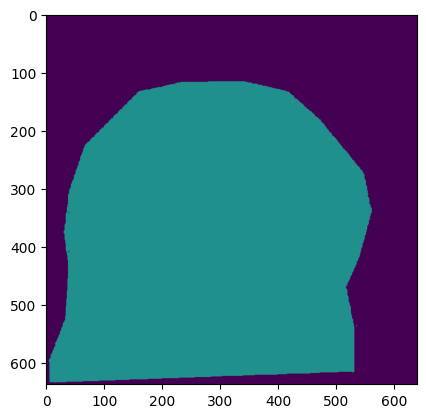

In [24]:

new_grayscale_label_mask = cv2.imread(save_path)
new_grayscale_label_mask = cv2.cvtColor(new_grayscale_label_mask, cv2.COLOR_BGR2GRAY)
plt.imshow(new_grayscale_label_mask)